# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [47]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [48]:
df

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [13]:
temps = df['temperature']
temps.head()

0    99.3
1    98.4
2    97.8
3    99.2
4    98.0
Name: temperature, dtype: float64

In [56]:
import matplotlib.pyplot as plt
import numpy

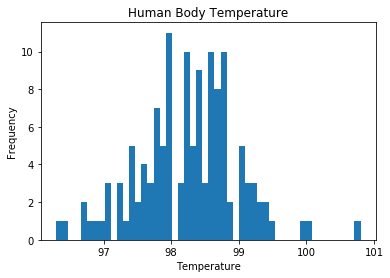

In [23]:
plt.hist(temps, 50)
plt.show()
plt.title("Human Body Temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
fig = plt.gcf()

In [25]:
population_std = 0.733183/(130^0.5)
population_std

TypeError: unsupported operand type(s) for ^: 'int' and 'float'

In [61]:
males = df[df.gender == 'M']
males = males['temperature']
males.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [60]:
females = df[df.gender == 'F']
females = females['temperature']
females.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

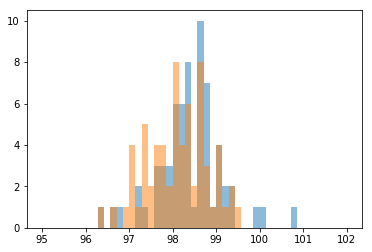

In [66]:
histogram=plt.figure()

x = [females]
y = [males]

bins = numpy.linspace(95, 102)

plt.hist(x, bins, alpha=0.5)
plt.hist(y, bins, alpha=0.5)
plt.show()

1. The observations of human body temperature appear to follow a roughly normal distribution, based on the first histogram above.

2. The sample size of 130 observation is sufficiently large for the purposes of this analysis. A peer-reviewed scientific journal would likely require a much larger sample size. The observations are independent, as the measurement of one individual's body temperature does not influence another's.

3. The mean of the sample is 98.25, with a standard deviation of 0.73. Thus, the standard deviation of the entire population is estimated to be 0.06. This suggests the sample mean is 5.45 standard deviations from 98.6. Given this information, there is less than a 0.0001 chance the true population mean is 98.6. This calculation involves a one-sample test and a z-statistic.

4. We can be reasonably confident that there is a 95% chance the true population mean is between 98.12 and 98.38. In other words, the margin of error (95% confidence level) is 0.13 degrees F. Because roughly 95% of temperature values are within that range, an individual whose temperature is outside that range might be considered "abnormal."

5. It is possible to compare the mean body temperatures for males and females in the sample using a two-sample test. For females, the mean was 98.39, with standard deviation of 0.74; for males, the mean was 98.10, with standard deviation of 0.70. 
    Thus, the mean of the difference between males and females is 0.29, with a standard deviation of 0.016. On the normal distribution of differences between males and females, 95% of differences should fall within 1.96 standard deviations (0.03) of the mean (0.29). Thus, the 95% confidence interval is between 0.26 and 0.32. 
    The null hypothesis would require that the mean difference between male and female temperatures be 0. At a 95% significance level, the observed mean difference would have to be at least 1.65 standard deviations above the mean of 0, or 0.026 degrees F. Because the observed mean is, in fact, 0.29 degrees, we can reject the null hypothesis. In conclusion, the difference between the body temperatures of males and females is statistically significant.
